Мы воспользуемся данными из одного датасета, который описывает
зависимость роста от обхвата шеи у женщин. Мы построим алгоритм линейной
регрессии и воспользуемся градиентным спуском для уменьшения функции потерь!
Данные действия мы будем делать вручную, без
использования библиотеки Sklearn с готовыми моделями.


In [2]:
# Импорт библиотеки numpy для работы с массивами и matplotlib для визуализации данных
import numpy as np
import matplotlib.pyplot as plt


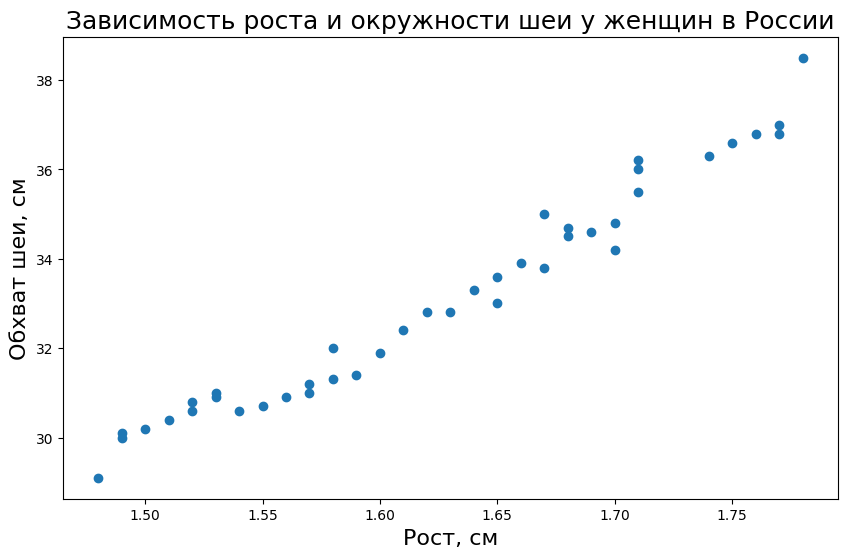

In [3]:
# Задаем массивы данных роста (X) и обхвата шеи (y)
X = np.array([1.48, 1.49, 1.49, 1.50, 1.51, 1.52, 1.52, 1.53, 1.53,
1.54, 1.55, 1.56, 1.57, 1.57, 1.58, 1.58, 1.59, 1.60, 1.61, 1.62, 1.63,
1.64, 1.65, 1.65, 1.66, 1.67, 1.67, 1.68, 1.68, 1.69, 1.70, 1.70,
1.71, 1.71, 1.71, 1.74, 1.75, 1.76, 1.77, 1.77, 1.78])
y = np.array([29.1, 30.0, 30.1, 30.2, 30.4, 30.6, 30.8, 30.9, 31.0,
30.6, 30.7, 30.9, 31.0, 31.2, 31.3, 32.0, 31.4, 31.9, 32.4, 32.8, 32.8,
33.3, 33.6, 33.0, 33.9, 33.8, 35.0, 34.5, 34.7, 34.6, 34.2, 34.8, 35.5,
36.0, 36.2, 36.3, 36.6, 36.8, 36.8, 37.0, 38.5])
# Создаем то чечную диаграмму для визуализации данных
plt.figure(figsize = (10,6))
plt.scatter(X, y)
# Добавляем подписи к осям и заголовок к графику
plt.xlabel('Рост, см', fontsize = 16)
plt.ylabel('Обхват шеи, см', fontsize = 16)
plt.title('Зависимость роста и окружности шеи у женщин в России',
fontsize = 18)
# Отображаем график
plt.show()


26.69174625207742 -10.293843835595947 0.11378239841533976


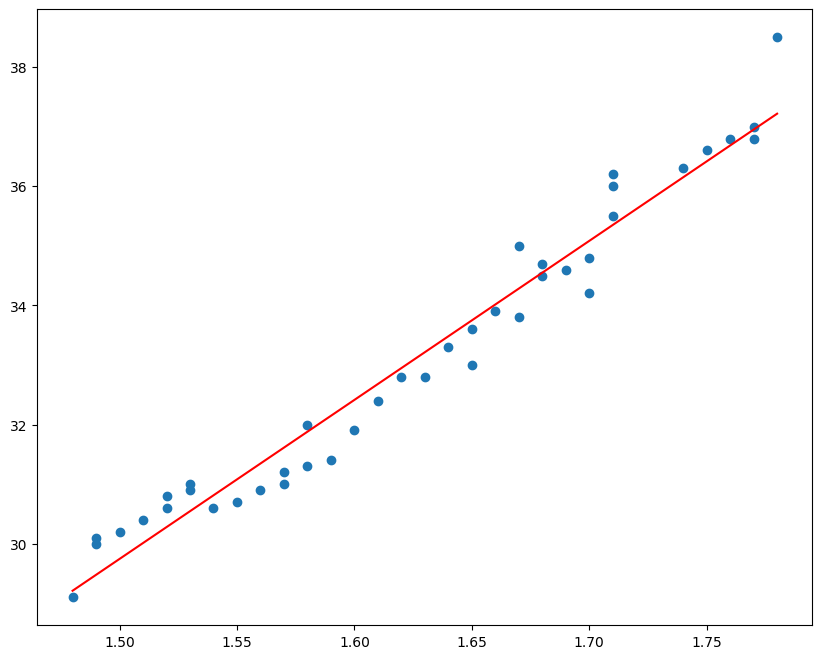

In [5]:
# Определение функции линейной регрессии
def regression(X, w, b):
  return w * X + b
# Определение функции потерь
def objective(X, y, w, b, n):
  return np.sum((y - regression(X, w, b)) ** 2) / (2 * n)
# Определение частной производной функции потерь по весу w
def partial_w(X, y, w, b, n):
  return np.sum(-X * (y - (w * X + b))) / n
# Определение частной производной функции потерь по смещению b
def partial_b(X, y, w, b, n):
  return np.sum(-(y - (w * X + b))) / n
# Функция для выполнения градиентного спуска
# Функция для выполнения градиентного спуска
def gradient_descent(X, y, iter, learning_rate):
  w, b = 0, 0 # Начальные значения параметров модели
  n = len(X) # Количество то чек данных
# Списки для хранения истории значений параметров и функции потерь
  w_list, b_list, l_list = [], [], []
  # Основной цикл градиентного спуска
  for i in range(iter):
    w_list.append(w)
    b_list.append(b)
    l_list.append(objective(X, y, w, b, n))
    # Вычисление градиентов
    par_1 = partial_w(X, y, w, b, n)
    par_2 = partial_b(X, y, w, b, n)
    # Обновление параметров
    w = w - learning_rate * par_1
    b = b - learning_rate * par_2
  return w_list, b_list, l_list

# Выполнение градиентного спуска
w_list, b_list, l_list = gradient_descent(X, y, iter = 200000, learning_rate = 0.01)
# Выводим последние значения ве са, смещения и функции потерь
print(w_list[-1], b_list[-1], l_list[-1])
# Получаем предсказания модели
y_pred_gd = regression(X, w_list[-1], b_list[-1])
# Создаем новый график для визуализации резу льтатов регрессии
plt.figure(figsize = (10, 8))
plt.scatter(X, y) # То чечная диаграмма исходных данных
plt.plot(X, y_pred_gd, 'r') # Линия предсказаний модели
plt.show()

